## Task 1 - Gradient descent 

Consider the following optimisation problem in $\mathbb{R}^n$

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^n} } f(\mathbf{x})$$

where $f(\mathbf{x})$ is the quartic function defined as

$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2 $$

with 

$$ A = \left( 
\begin{array}{ccccc} 
\frac{\lambda+1}{2} & \frac{\lambda - 1}{2} & 0 &\ldots & 0\\ 
\frac{\lambda-1}{2} & \frac{\lambda + 1}{2} & 0 &\ldots & 0\\
0 & 0 & 1 &\ldots & 0\\ 
\vdots & \vdots & \vdots &\ddots & \vdots\\ 
0 & 0 & 0 &\ldots & 1
\end{array}
\right),
$$
$$
\mathbf{x}_* = \left( \begin{array}{c}
\sqrt{2}\\
\sqrt{3}\\
1\\
\vdots\\
1
\end{array}
\right)
$$
and $\lambda > 0$ is a parameter that controls the shape of the objective function. A reasonable range of values for $\lambda$ is $\frac{1}{10} \leq \lambda \leq 10$.


In [1]:
#importing neccesary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

To begin the assignment I shall first create functions to hardcode the above equations

In [2]:
#setting range of lambda values
lambda_range = np.linspace(0.1, 10, 100)

#function that returns matrix A and column vector x_star given n and lambda values
def get_matrices(n, lamda):
    #creating A matrix
    A = np.zeros(shape=(n, n))
    #setting top corner elements
    A[0, 0] = (lamda +1)/2
    A[1, 1] = (lamda +1)/2
    A[1, 0] = (lamda -1)/2
    A[0, 1] = (lamda -1)/2
    #setting diagonal elements as 1
    for i in range(2, n):
        A[i, i] = 1

    #creating x star array
    x_star = np.ones(shape = (n, 1))
    x_star[0] = np.sqrt(2)
    x_star[1] = np.sqrt(3)
    
    return A, x_star

#creating function given x is same shape as x_star (column vector)
def f(x):
    return 0.25*(((x-x_star).T)@A@(x-x_star))**2


### 1.1
Write down the solution to this problem.


$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2  = 0$$
When $ \mathbf{x} = \mathbf{x}_*$ therefor $\mathbf{x} = \mathbf{x}_* = \left( \begin{array}{c}
\sqrt{2}\\
\sqrt{3}\\
1\\
\vdots\\
1
\end{array}
\right)$.

### 1.2 
Write down the eigenvalues of matrix A.

The eigenvalues are:
$[1, 1, \dots, \lambda]$

I shall demonstrate this below where I have quickly calculated the eigenvalues for different lambdas using a linear algebra package within numpy.

In [3]:
lambda1 = 0.3
lambda2 = 7
lambda3 = 10

A1, x_star1 = get_matrices(3, lambda1)
A2, x_star2 = get_matrices(2, lambda2)
A3, x_star3 = get_matrices(4, lambda3)


eigenvals1 = np.linalg.eigvals(A1)
eigenvals2 = np.linalg.eigvals(A2)
eigenvals3 = np.linalg.eigvals(A3)

print(f'The eigenvalues of matrix A1 with lambda = {lambda1} are {eigenvals1}')
print(f'The eigenvalues of matrix A2 with lambda = {lambda2} are {eigenvals2}')
print(f'The eigenvalues of matrix A3 with lambda = {lambda3} are {eigenvals3}')


The eigenvalues of matrix A1 with lambda = 0.3 are [1.  0.3 1. ]
The eigenvalues of matrix A2 with lambda = 7 are [7. 1.]
The eigenvalues of matrix A3 with lambda = 10 are [10.  1.  1.  1.]


### 1.3
Derive a formula for the gradient of $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$.

Derivation:

From
$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2 $$

$$ \nabla f(\mathbf{x}) = \frac{d}{d\mathbf{x}} f(\mathbf{x})$$

Replacing variables for $y = (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)$:
$$ f(y) = \frac{1}{4} y^{2}$$
Therefor
$$ \nabla f(y) = \frac{1}{2} y$$

Via chain rule:  $\nabla f(\mathbf{x}) = \frac{1}{2} y * \frac{dy}{dx}$
$$\frac{dy}{dx} = (x-x_{*})^{T}*A + (x-x_{*})^{T}*A^{T} = 2*(x-x_{*})^{T}A$$
as $A^{T}$ is symmetric so $A = A^{T}$.

Therefor 
$$ \nabla f(\mathbf{x}) = ((\mathbf{x} - \mathbf{x}_{*})^{T}A(\mathbf{x}-\mathbf{x}_{*}))(\mathbf{x}-\mathbf{x}_{*})^{T}A)$$

I shall now write a function to calculate this for later use.

In [4]:
def grad_fx(x):
    return (((x-x_star).T)@A@(x-x_star))@((x-x_star).T)@A


### 1.4 
Use your results to implement the gradient descent algorithm in Python. Use your algorithm to numerically solve the above problem with $n=2$ and $\lambda=2$. A good initial point is $\mathbf{x}_0 = 5\,\mathbf{x}_*$.  A good tolerance is $\varepsilon = 10\, \epsilon_m$.

The gradient descent algorithm goes like: 

Start from a point, $\mathbf{x}_0$.

1. Calculate the unit direction vector 
$$\mathbf{v}_n = - \frac{\nabla\,f(\mathbf{x}_n)}{\left| \nabla\,f(\mathbf{x}_n)\right|}.$$
2. Perform line minimisation in direction of $\mathbf{v}_n$:
$$
\lambda^* = \arg \min_\lambda f(\mathbf{x}_n + \lambda\,\mathbf{v}_n)
$$
3. Move to new position $\mathbf{x}_{n+1} = \mathbf{x}_n + \lambda^*\,\mathbf{v}_n$. 
4. Repeat until $\left| \nabla\,f(\mathbf{x}_n) \right| < \epsilon_\text{tol}$.

In this instance the line minimisation is done by the golden section search algorithm which I shall define first below. This funciton has been adapted for use in this case from the golden section pseudo code given in lectures.

In [5]:
def gss(func, x, v, a, b, c, tol, Y=None):
    omega = (5**0.5 - 1)/2 #golden ratio
    
    #repeat until tolerence met
    while np.abs(c-a) > tol:
        #specify want the larger interval
        if np.abs(c-b) > np.abs(b-a):
            i = b+(1-omega)*(c - b)
            #checking to see if have extra input in function or not
            if Y != None:
                #if conditions met, i.e. within that bracket, then update the range of the bracket
                if func(Y, x + b*v) < func(Y, x + i*v):
                    a, b, c = a, b, i
                else:
                    a, b, c = b, i, c
                
            else:
                #if conditions met, i.e. within that bracket, then update the range of the bracket
                if func(x + b*v) < func(x + i*v):
                    a, b, c = a, b, i
                else:
                    a, b, c = b, i, c
        else:
            i = b-(1-omega)*(b-a)
            if Y != None:
                if func(Y, x + b*v) < func(Y, x + i*v):
                    a, b, c = i, b, c
                else:
                    a, b, c = a, i, b
            else:
                if func(x + b*v) < func(x + i*v):
                    a, b, c = i, b, c
                else:
                    a, b, c = a, i, b
    #once bracket size smaller than tolerance return value
    return  i
        

I shall now implement the gradient descent algorithm using the golden section search above.

In [6]:
def gradient_descent(x0, func, grad_func, tol, max_iter = None, Y = None):
    #have to reshape arrays as outputs of grad function are size 1*n but inputs need n*1 to be the same shape as the
    #x_star vector
    x = [x0, ]
    v = []
    #implementation so fucntion can be used for both parts of assignment
    if Y != None:
        grad = [grad_func(Y, x[0]), ]
    else:
        grad = [grad_func(x[0]).reshape(-1, 1), ]

    while np.linalg.norm(grad[-1]) > tol and (max_iter == None or i < max_iter): 
        #calculating step direction
        v.append(((grad[-1]/np.linalg.norm(grad[-1]))*-1))

        #initial points not important as long as they are brackets of the solution
        a = 0
        c = 1000
        b = a + (c-a)*((np.sqrt(5)-1)/2)
        
        #performing minimisation using golden section search - calculates step size
        lambda_star = gss(func, x[-1], v[-1], a, b, c, tol, Y) 
    
        #taking step
        x.append((x[-1] + v[-1]*lambda_star))
                                
        if Y != None:
            grad.append(grad_func(Y, x[-1]))
                        
        else:   
            grad.append(grad_func(x[-1]).reshape(-1, 1))
    
    return x

To implement the above algorithm we need to know the machines precision, i.e. the minimal value which added to x creates a number bigger than x. The code in the cell below calculates and outputs this for us.

In [7]:
#finding machine precision, might be the wrong type of float???
machine_precision = (np.finfo(float).eps)
print(f"The precision of this machine is {machine_precision:.4e}")

The precision of this machine is 2.2204e-16


I shall now use the functions defined above to perform the gradient descent algorithm with the suggested parameters.

In [8]:
#using suggested values
n = 2
lamda = 2
tol = 10*machine_precision

#calculating/making relevant sized A and x_star
A, x_star = get_matrices(n, lamda)
x0 = 5*x_star

#performing gradient descent and storing coordinates stepped through in single variable
coords = gradient_descent(x0, f, grad_fx, tol)

To effectively visualize what is happening when running this algorithm, I shall plot a contour plot that shows how the gradient descent steps through to find the solution. To do this a meshgrid to plot contour lines needs to be made as well as an array storing the heights of the contour plots.

In [9]:
def get_Z(x, y):
    '''
    function that evaluates the given function 'f' at all locations within the mesh grid
    '''
    z = np.zeros(shape = (len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[i, j] = f((np.array([x[i,j], y[i,j]]).reshape(-1, 1)))
    return z

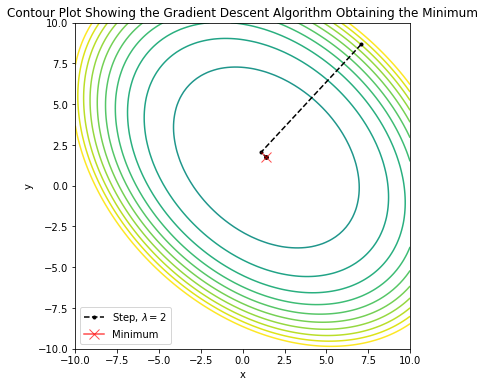

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

#defining range of grid to plot and creating mesh
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x_values, y_values)

#evaluating the funciton throughout the mesh
z = get_Z(x, y)

#defining the levels for the contour plot
levels = np.linspace(-8000, 8000, 20)

ax.contour(x, y, z, levels = levels) 
ax.plot(np.array(coords)[:,0], np.array(coords)[:,1], '.--', label = f'Step, $\lambda = {lamda}$', color = 'black') #plots steps 
ax.plot(np.sqrt(2), np.sqrt(3), marker = 'x', markersize = 10, label = 'Minimum', alpha = 0.7, color = 'red') #plots exact value
ax.legend(loc = 'lower left')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour Plot Showing the Gradient Descent Algorithm Obtaining the Minimum')
#reshape plot lines should be crossing contors at 90 degrees
plt.show()
#maybe plot with a smaller lambda to see the step size curve better.

The contour plot above shows how the gradient descent algorithm has found the minimum. It shows that due to the large size of $\lambda = 2$ the algorithm has taken a large step to close to the solution and then subsequent smaller steps. I am assured in the correctness of my implementation by the right angle turn at the change in step and by the fact the path taken passes at right angles through the contour lines.

### 1.5 
Plot how the distance from the minimum decreases as a function of the number of iterations and determine the convergence rate. 

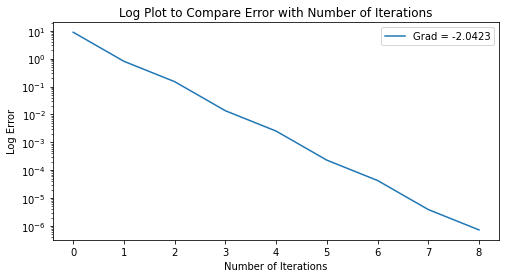

In [41]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 4))
#calculating error by minusing the exact x, y value off from the current coords
error = np.linalg.norm([np.array(coords)[:, 0] - x_star[0], np.array(coords)[:, 1] - x_star[1]], axis = 0)

#using scipy linear regression to calculate gradient
line_info1 = linregress(np.arange(0, len(error), 1), np.log(error).reshape(1, len(error))[0])
grad = line_info1[0]

ax1.semilogy([i for i in range(len(error))], error, label = f"Grad = {grad:.5g}")
ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Log Error')
ax1.set_title('Log Plot to Compare Error with Number of Iterations')
ax1.legend()

plt.show()

The above plot suggests a convergence rate of order $\approx O(n^{2})$ using the steppest gradient descent algorithm with the golden section search minimiser.

After completing this section of the assignment I felt it worth repeating the steps above with a lambda of smaller size too get a clearer picture of what is happening as well as a greater number of step iterations so as to calculate a potentially more accurate gradient.

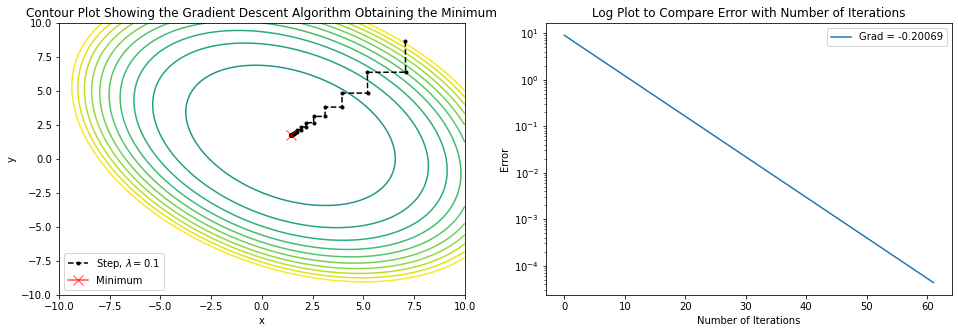

In [12]:
n = 2
lamda = 0.1

#calculating/making relevant sized A and x_star
A, x_star = get_matrices(n, lamda)
x0 = 5*x_star

#performing gradient descent and storing coordinates stepped through in single variable
coords = gradient_descent(x0, f, grad_fx, tol)

#error calculation
error = np.linalg.norm([np.array(coords)[:, 0] - np.sqrt(2), np.array(coords)[:, 1] - np.sqrt(3)], axis = 0)

#plotting
fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(16, 5))

levels = np.linspace(-6000, 6000, 20)
ax2.contour(x, y, z, levels = levels)
ax2.plot(np.array(coords)[:,0], np.array(coords)[:,1], '.--', label = f'Step, $\lambda = {lamda}$', color = 'black') #plots steps 
ax2.plot(np.sqrt(2), np.sqrt(3), marker = 'x', markersize = 10, label = 'Minimum', alpha = 0.7, color = 'red') #plots exact value
ax2.legend(loc = 'lower left')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot Showing the Gradient Descent Algorithm Obtaining the Minimum')

#using scipy linear regression to calculate gradient
line_info = linregress(np.arange(0, len(error), 1), np.log(error).reshape(1, len(error))[0])
grad = line_info[0]

ax3.semilogy([i for i in range(len(error))], error, label = (f"Grad = {grad:.5g}"))
ax3.set_xlabel('Number of Iterations')
ax3.set_ylabel('Error')
ax3.set_title('Log Plot to Compare Error with Number of Iterations')
ax3.legend()

plt.show()

This felt neccesary as we can see the perpendicular direction changes alot more apparently within the contour plot above. We can aslo see that the log plot for the error is a much straighter line than the previous plot which had visible oscillations and the gradient is closer to the $O(n^{2})$ value

### 1.6
Determine empirically how the number of steps required to solve the problem at $n = 3$ varies with $\lambda$.

In [13]:
#setting n = 3 and using iterating lambda range defined at the start
n = 3
num_steps = []
for l in lambda_range:
    A, x_star = get_matrices(n, l)
    x0 = 5*x_star

    coords = gradient_descent(x0, f, grad_fx, tol)
    num_steps.append(len(np.array(coords))) #storing the len of each gradient descent completion

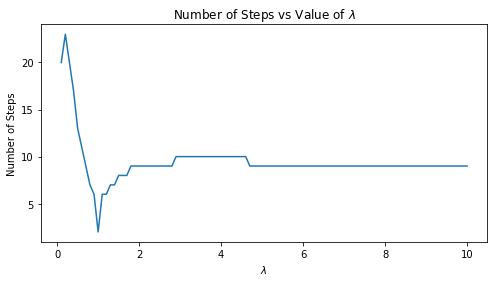

In [14]:
#plotting how number of steps varies with lambda
fig2, ax5 = plt.subplots(1, 1, figsize=(8, 4))

ax5.plot(lambda_range, num_steps)
ax5.set_xlabel('$\lambda$')
ax5.set_ylabel('Number of Steps')
ax5.set_title('Number of Steps vs Value of $\lambda$')
plt.show()

We can see from the plot above that as lambda increases the number of steps needed to reach the minimum decreases till it reaches a minimum at $\lambda = 1$. There is then an increase as lambda increases past 1 till a plateu of roughly 10 steps from $\lambda = 2$. The minimum at $\lambda = 1$ is because as $\lambda$ approaches the 1 the matrix A becomes increasingly similar to the identity matrix which makes the system very easy to solve.

## Task 2 Stochastic Gradient Descent

Consider the following linear model expressing a noisy relationship between a target variable, $y \in \mathbb{R}$ and a set of predictor variables, $\mathbf{x} \in \mathbb{R}^n$:

$$ y = \mathbf{\alpha}^T \, \mathbf{x} + \xi $$

where $\mathbf{\alpha} \in \mathbb{R}^n$ is a set of parameters and $\xi \sim N(0, \sigma^2)$ is a normal random variable with mean 0 and variance $\sigma^2$ representing the error. We are given a set of $m$ observations

$$Y = \left\{(\mathbf{x}^{(i)},\, y^{(i)})\ : i=1\ldots m \right\}$$

Our task is to find the "best" set of parameters, $\mathbf{\alpha}_*$ given the observations by solving the ordinary least squares problem:

$$\mathbf{\alpha}_* = \min_{\substack{\mathbf{\alpha} \in \mathbb{R}^n} } F(\mathbf{\alpha}\, |\, Y)$$

where

$$ F(\mathbf{\alpha}\, |\, Y) = \frac{1}{2}\, \frac{1}{m} \sum_{i=1}^m\left( y^{(i)} - \mathbf{\alpha}^T\,\mathbf{x}^{(i)}\right)^2$$

Create a test problem with the following specifications:
```
n=10
m=100
xmax = 10.0
sigma = 0.25
```
The problem as well as arrays containing the initial conditions are hard coded below. 

In [15]:
#setting initial conditions to be used
n = 10
m = 100
xmax = 10.0
sigma = 0.25

#creating a random number to be used as noise
eta = np.random.normal(loc=0, scale = sigma**2)

#functions to create x and y arrays of the same shape so can be joined
def get_y(x, alpha, noise):
    return (alpha.T@x + noise)*np.ones(shape = (n, 1))

def get_x(xmax):
    return np.random.randint(0, xmax+1, 10).reshape(-1, 1)

#setting alpha as array of ones for easy comparisson later
set_alpha = np.array(np.ones(shape = (n, 1)))

#creating whole data set of paired x and y values
def get_Y(x, m):
    Y = []
    for i in range(0, m):
        x = get_x(xmax)
        Y.append(np.array([x, get_y(x, set_alpha, eta)]))
    return Y
    
Y = get_Y(x, m)

In [16]:
#function to calculate given function for the Y dataset, returns a singular value
def F(Y, alpha):
    return 0.5*(1/len(Y))*np.sum([(Y[i][1][0] - alpha.T@Y[i][0, :])**2 for i in range(0, len(Y))])


### 2.1 
Solve the problem using previous gradient descent code.

To do this I needed to calculate the derivative of the function to be minimise with respect to $\alpha$. This is given by:
$$\frac{d\mathbf{F}}{d\alpha} = \frac{1}{m}\Sigma_{i=1}^{m}(-\underline{x}^{(i)})(y^{(i)} - \alpha^{T} \underline{x}^{i})$$
through the chain rule and will be hard coded below.

In [17]:
#calculates the gradient of the function wrt to alpha for the Y dataset, returns a column vector
def gradF(Y, alpha):
    return (1/len(Y))*np.sum([-Y[i][0, :]*(Y[i][1][0]-(alpha.T)@Y[i][0, :]) for i in range(1, len(Y))], axis = 0)


At this stage, to use my previous code I had to adapt it so that it would work for this method. When I had finished adapting it I realised that this made the code to convoluted to read and I preferred it in the seperated format so I return to using the new equations. However, I have left my original gradient descent adapted with this functionality for interest. The gradient descent function is therefor performed using the functions given below.

In [18]:
def new_gss(func, x, v, a, b, c, tol, Y):
    omega = (5**0.5 - 1)/2 #golden ratio
    
    #repeat until tolerence met
    while np.abs(c-a) > tol:
        if np.abs(c-b) > np.abs(b-a):
            i = b+(1-omega)*(c - b)
            #if conditions met, i.e. within that bracket, then update the range of the bracket
            if func(Y, x + b*v) < func(Y, x + i*v):
                a, b, c = a, b, i
            else:
                a, b, c = b, i, c
        else:
            i = b-(1-omega)*(b-a)
            if func(Y, x + b*v) < func(Y, x + i*v):
                a, b, c = i, b, c
            else:
                a, b, c = a, i, b
    #once bracket size smaller than tolerance return value
    return  i

In [19]:
def new_gradient_descent(alpha0, tol, max_iter):
    alpha = [alpha0, ]
    v = []
    grad = [gradF(Y, alpha[0]), ]#dont know if need to reshape???
    i = 0
    while np.linalg.norm(grad[-1]) > tol and i < max_iter: 
        #calculating step direction
        v.append(((grad[-1]/np.linalg.norm(grad[-1]))*-1))

        #initial points not important as long as they are brackets of the solution
        a = 0
        c = 1000
        b = a + (c-a)*((np.sqrt(5)-1)/2)
        
        #performing minimisation using golden section search - calculates step size
        lambda_star = new_gss(F, alpha[-1], v[-1], a, b, c, tol, Y) 
    
        #taking step
        alpha.append((alpha[-1] + v[-1]*lambda_star))
                                
        grad.append(gradF(Y, alpha[-1]))
        
        i += 1
  
    
    return alpha



As the dimensions have increased using the same tolerance condition used before is a lot tighter of a condition to meet. This means that the code is liable to run for a long time before reaching the given tolerance, if the given tolerance is ever met. To combat this I have introduced a max iteration variable into the function. Therefor it would be interesting to investigate how the errors on the gradient descent vary as the number of iterations increase. 

In [20]:
#starting from randomly generated alpha array
alpha0 = np.array(np.random.randint(0, xmax+1, 10)).reshape(-1, 1)

grad_max_iterations = np.arange(30, 210, 30)
error_grad = []

for i in range(0, len(grad_max_iterations)):
    set_alpha_est = new_gradient_descent(alpha0, tol, grad_max_iterations[i])
    
    error_grad.append(np.linalg.norm(set_alpha_est[-1].reshape(1, len(set_alpha_est[-1])) - np.ones(shape = len(set_alpha_est[-1]))))


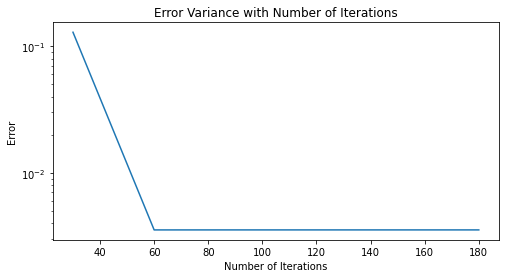

In [21]:
fig3, ax6 = plt.subplots(1, 1, figsize=(8, 4))

ax6.semilogy(grad_max_iterations, error_grad)
ax6.set_xlabel('Number of Iterations')
ax6.set_ylabel('Error')
ax6.set_title('Error Variance with Number of Iterations')
plt.show()


The plot above was not what I expected, as the error seems to reduce to 60 iterations but then plateu. As we can see the error has not reached the tolerance provided by machine precision ($10^{-16}$), the error must be being limited from reducing further by some other reason which I have not been able to deduce in the time I have had, possibly the noise.

### 2.2
Modify the code to perform the optimisation through stochastic gradient descent.
The stochastic gradient descent involves taking a random sample of the data set and calculate the gradient descent on that sample, before updating the initial paremeter using a learning rate. The learning rate here is still given as the best value calculated via golden section search. In the code below I have set the sample percentage as 0.3 and have the max iterations at 100 which can be seen to be more than enough as shown by the graph above.

In [22]:
def stochastic_gradient_descent(alpha0, tol, max_iter, sample_percent, learning_rate=None):
    #calculating the number of samples required and generating this number of random indeces
    n_samples = int(len(Y)*sample_percent)
    indeces = np.random.randint(0, m, n_samples)
    
    #storing this section of array in new list
    Y_seg = []
    Y_seg.append([Y[i] for i in indeces])
    
    #performing gradient descent as before with this subsection of the total data
    alpha = [alpha0, ]
    v = []
    grad = [gradF(Y_seg[0], alpha[0]), ]
    i = 0
    #performed while tolerance condition is not met and whilst max number of iterations has not been met
    while np.linalg.norm(grad[-1]) > tol and i < max_iter: 
        
        #calculating step direction
        v.append(((grad[-1]/np.linalg.norm(grad[-1]))*-1))
        
        #for last part of assignment when have to set the learning rate physically
        if learning_rate == None:
            #initial points not important as long as they are brackets of the solution
            a = 0
            c = 1000
            b = a + (c-a)*((np.sqrt(5)-1)/2)
        
            #performing minimisation using golden section search - calculates step size
            lambda_star = new_gss(F, alpha[-1], v[-1], a, b, c, tol, Y_seg[0]) 

        
        #dont use golden section search as set learning rate ourselves
        else:
            lambda_star = learning_rate
    
        #taking step
        alpha.append((alpha[-1] + v[-1]*lambda_star))
                                
        grad.append(gradF(Y_seg[0], alpha[-1]))
        
        #for the max iteration check
        i += 1    
    return alpha

    

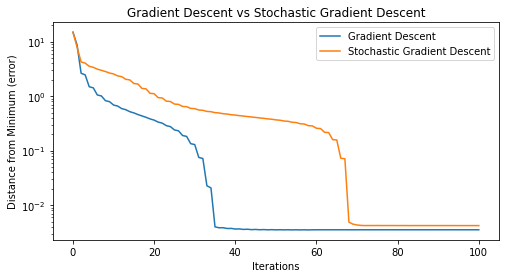

In [38]:
#setting sample percentage and max iterations
sample_percentage = 0.3
max_iterations = 100

#getting how alpha changes for both methods
stoc_alpha = stochastic_gradient_descent(alpha0, tol, max_iterations, sample_percentage)
grad_alpha = new_gradient_descent(alpha0, tol, max_iterations)


#calculating distance from x_min at each step
stoc_error = np.zeros(shape = len(stoc_alpha))
grad_error = np.zeros(shape = len(grad_alpha))

for i in range(0, len(stoc_alpha)):
    stoc_error[i] = np.linalg.norm(stoc_alpha[i].reshape(1, len(stoc_alpha[i])) - np.ones(shape = len(stoc_alpha[i])), axis=1)
for i in range(0, len(grad_alpha)):
    grad_error[i] = np.linalg.norm(grad_alpha[i].reshape(1, len(grad_alpha[i])) - np.ones(shape = len(grad_alpha[i])), axis=1)

    
    
fig4, ax7 = plt.subplots(1, 1, figsize=(8, 4))

#plotting difference bewteen stochastic and normal gradient descent
ax7.semilogy([i for i in range(0, len(grad_error))], grad_error, label = ('Gradient Descent'))
ax7.semilogy([i for i in range(0, len(stoc_error))], stoc_error, label = ('Stochastic Gradient Descent'))
ax7.set_title('Gradient Descent vs Stochastic Gradient Descent')
ax7.set_xlabel('Iterations')
ax7.set_ylabel('Distance from Minimum (error)')
ax7.legend()
plt.show()

The graph above shows the different convergence rates of the two methods. From it we can see that the gradient descent method has convered to a lower error than the stochastic method in fewer number of iterations. This implies it is a more accurate method that needs fewer iterations which is expected as the stochastic method takes a sub sample so is likely to be less accurate.

### 2.3
Fix n = 10 and m = 250 and compare the performance with different learning rates. Can you find one that performs well?

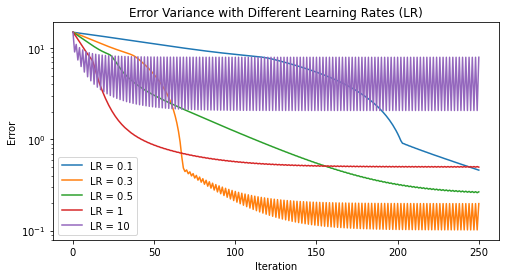

In [39]:
#setting max iterations and values of learning rate to be investigated
max_iterations = 250
learning_rate_range = [0.1, 0.3, 0.5, 1, 10]

fig5, ax8 = plt.subplots(1, 1, figsize=(8, 4))

#calculating the error at each step for each learning rate and plotting iteratively
for i in range(0, len(learning_rate_range)):
    stoc_alpha = stochastic_gradient_descent(alpha0, tol, max_iterations, sample_percentage, learning_rate_range[i])
    stoc_error = []
    for j in range(0, len(stoc_alpha)):
        stoc_error.append(np.linalg.norm(stoc_alpha[j].reshape(1, len(stoc_alpha[j])) - np.ones(shape = len(stoc_alpha[j])), axis=1))
    ax8.semilogy([i for i in range(0, len(stoc_error))], stoc_error, label = (f"LR = {learning_rate_range[i]}"))

#making plots nice
ax8.set_xlabel('Iteration')
ax8.set_ylabel('Error')
ax8.set_title('Error Variance with Different Learning Rates (LR)')
ax8.legend()
plt.show()

The graph above shows how the error at each step convergence with different learning rates. I have mainly looked at small learning rates as they are similar to the values by GSS, this is backed up by the poor performance at a learning rate of 10 which converges quite quickly to a rather large error. The best value according to the graph above is LR = 0.3 which converges to the smallest error rate although learning rate 0.1 is still decreasing. However none of the learning rates used above compare to the ones when GSS is used as a minimiser.

With greater time I would like to investigate how vary the magnitude of the noise affects the results throughout this assignment. In addition to this I would be interested in varying the sample size used within the GSS and producing a plot of accuracy vs sample size actually I have time to do this below.

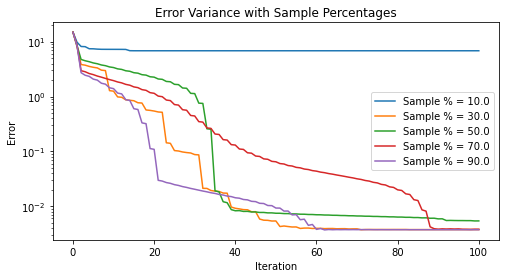

In [40]:
#setting values of sample percentage to be investigated
sample_percentage = [0.1, 0.3, 0.5, 0.7, 0.9]
max_iterations = 100

fig6, ax9 = plt.subplots(1, 1, figsize=(8, 4))

#calculating the error at each step for each sample percentage and plotting iteratively
for i in range(0, len(sample_percentage)):
    stoc_alpha = stochastic_gradient_descent(alpha0, tol, max_iterations, sample_percentage[i])
    stoc_error = []
    for j in range(0, len(stoc_alpha)):
        stoc_error.append(np.linalg.norm(stoc_alpha[j].reshape(1, len(stoc_alpha[j])) - np.ones(shape = len(stoc_alpha[j])), axis=1))
    ax9.semilogy([i for i in range(0, len(stoc_error))], stoc_error, label = (f"Sample % = {sample_percentage[i]*100}"))


ax9.set_xlabel('Iteration')
ax9.set_ylabel('Error')
ax9.set_title('Error Variance with Sample Percentages')
ax9.legend()
plt.show()

The graph above shows us that as expected a sample size of 10% is too small to give a good representation of the data, with convergence too relatively large error rate. However all other sample percentages seem to eventually reached the same minimal error size as seen in section 2.2. Interestingly it is not the itertaion with the greatest sample size that has reached this value with the least iterations it is infact the 30% iteration, however this does seem to change with each time I run the above cell, so I would have to do this for a number of repeats and plot averages to gain any meaningful insights although it is still interesting in itself that it is not always 90%. However now I have run out of time.